 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Homework\Week 4\Instructions\Starter_Code\Resources\whale_returns.csv'

In [3]:
# Reading whale returns
whale_df = pd.read_csv(whale, infer_datetime_format=True, parse_dates=True, index_col='Date')
whale_df.head()
whale_df.shape

(1060, 4)

In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls and sort index order
whale_drop_df = whale_df.dropna()
whale_drop_df.sort_index()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns into pandas dataframe
algo = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Homework\Week 4\Instructions\Starter_Code\Resources\algo_returns.csv'

algo_df = pd.read_csv(algo, infer_datetime_format=True, parse_dates=True, index_col='Date')
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls and sort index
algo_drop_df = algo_df.dropna()
algo_drop_df.sort_index()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
SP500 = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Homework\Week 4\Instructions\Starter_Code\Resources\sp_tsx_history.csv'

SP500_df = pd.read_csv(SP500, infer_datetime_format=True, parse_dates=True, index_col='Date')
SP500_df.head()
#SP500_df.tail()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
SP500_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types: remove $ sign
SP500_df['Close'] = SP500_df['Close'].str.replace("$", "")
SP500_df

C:\Users\TribThapa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"
...,...
2019-12-20,"17,118.44"
2019-12-23,"17,128.71"
2019-12-24,"17,180.15"


In [12]:
# Fix Data Types: remove comma
SP500_df.replace(",", "", regex=True, inplace=True)
SP500_df

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [13]:
# Convert to dtype to float
SP500_df['Close'] = SP500_df['Close'].astype('float')
SP500_df

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [14]:
# Check dtype
SP500_df.dtypes

Close    float64
dtype: object

In [15]:
# Calculate Daily Returns
daily_returns = SP500_df['Close'].pct_change()
daily_returns

Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
                ...   
2019-12-20    0.003188
2019-12-23    0.000600
2019-12-24    0.003003
2019-12-27   -0.000695
2019-12-30   -0.004057
Name: Close, Length: 1818, dtype: float64

In [16]:
# Drop nulls
SP500_df.dropna()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [17]:
# Rename `Close` Column to be specific to this portfolio.
SP500_df = SP500_df.rename(columns={'Close' : 'SP500_Close'})
SP500_df

,SP500_Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [18]:
SP500_df['SP500'] = daily_returns
SP500_df

,SP500_Close,SP500
Date,,
2012-10-01,12370.19,NaN
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305
...,...,...
2019-12-20,17118.44,0.003188
2019-12-23,17128.71,0.000600
2019-12-24,17180.15,0.003003


In [19]:
#Remove 'Close' column
SP500_df.drop(columns=['SP500_Close'], inplace=True)
SP500_df.sort_index()

,SP500
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_drop_df, algo_drop_df, SP500_df], axis='columns', join='inner')
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

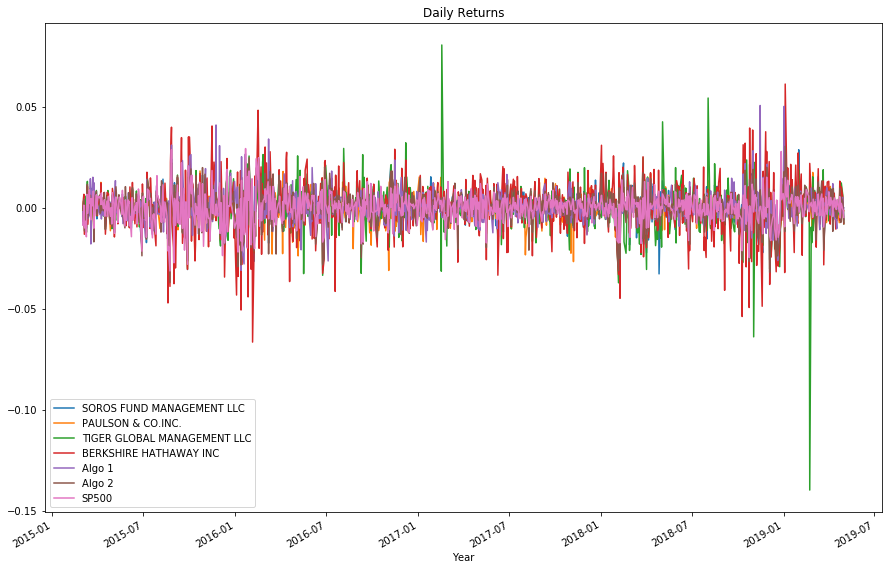

In [21]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(15, 10), xlabel='Year', title='Daily Returns')

#### Calculate and Plot cumulative returns.

Text(0, 0.5, 'Cumulative returns')

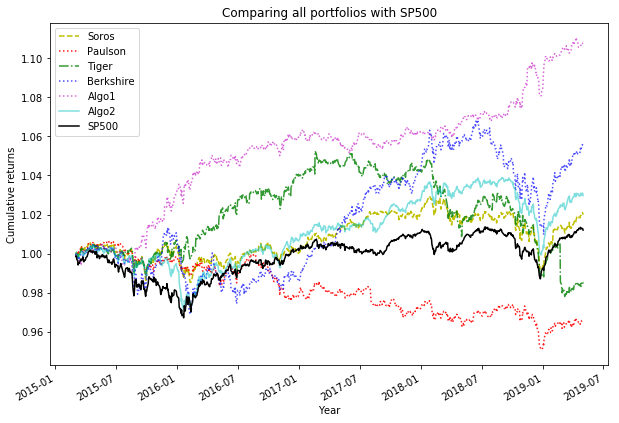

In [22]:
# Calculate weighted returns (equal weighting)
soros_returns = combined_df['SOROS FUND MANAGEMENT LLC'] * 0.14
paulson_returns = combined_df['PAULSON & CO.INC. '] * 0.14
tiger_returns = combined_df['TIGER GLOBAL MANAGEMENT LLC'] * 0.14
berkshire_returns = combined_df['BERKSHIRE HATHAWAY INC'] * 0.14
algo1_returns = combined_df['Algo 1'] * 0.14
algo2_returns = combined_df['Algo 2'] * 0.14
SP500_returns = combined_df['SP500'] * 0.14

# Calculate cumulative returns of all portfolios
cumlative_returns_soros = (1+soros_returns).cumprod()
cumlative_returns_paulson = (1+paulson_returns).cumprod()
cumlative_returns_tiger = (1+tiger_returns).cumprod()
cumlative_returns_berkshire = (1+berkshire_returns).cumprod()
cumlative_returns_algo1 = (1+algo1_returns).cumprod()
cumlative_returns_algo2 = (1+algo2_returns).cumprod()
cumlative_returns_sp500 = (1+SP500_returns).cumprod()

# Plot cumulative returns
plot1 = cumlative_returns_soros.plot(figsize=(10, 7), color='y', linestyle='dashed', title='Comparing all portfolios with SP500')
cumlative_returns_paulson.plot(ax=plot1, color='r', linestyle='dotted', alpha=0.9)
cumlative_returns_tiger.plot(ax=plot1, color='g', linestyle='dashdot', alpha=0.8)
cumlative_returns_berkshire.plot(ax=plot1, color='b', linestyle='dotted', alpha=0.7)
cumlative_returns_algo1.plot(ax=plot1, color='m', linestyle='dotted', alpha=0.6)
cumlative_returns_algo2.plot(ax=plot1, color='c', alpha=0.5)
cumlative_returns_sp500.plot(ax=plot1, color='black')

plot1.legend(['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo1', 'Algo2', 'SP500'])
plot1.set_xlabel('Year')
plot1.set_ylabel('Cumulative returns')

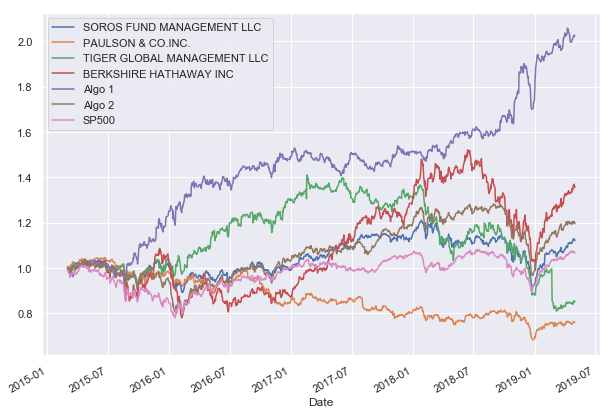

In [55]:
#Alternative approach to get cumulative returns. 
#Approach above allows you to get a better handle on data but not feasible with large DataFrames.
cumlative_returns = (1+combined_df).cumprod()
cumlative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


Text(0, 0.5, 'Daily returns')

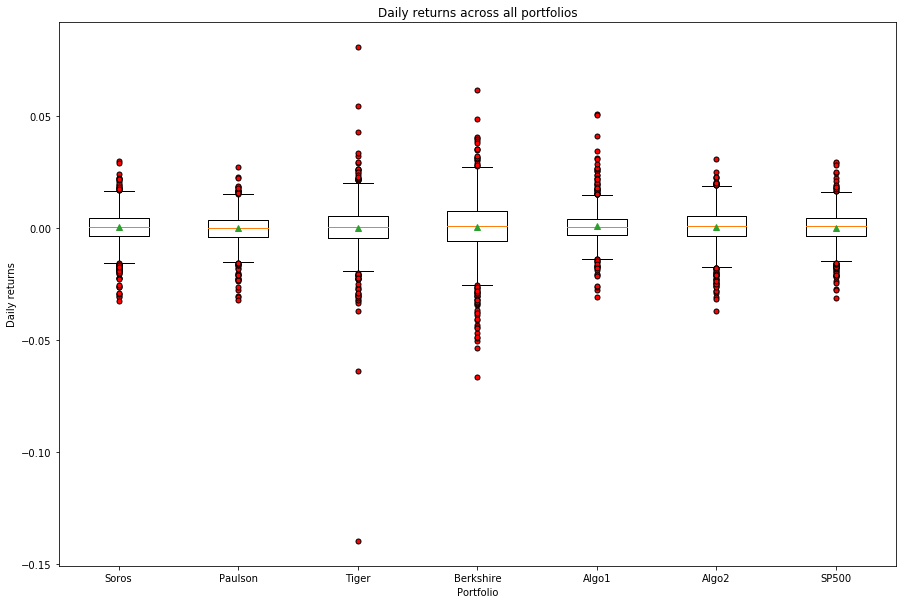

In [23]:
# Box plot to visually show risk
data_to_plot = [combined_df['SOROS FUND MANAGEMENT LLC'], 
                combined_df['PAULSON & CO.INC. '],
                combined_df['TIGER GLOBAL MANAGEMENT LLC'],
                combined_df['BERKSHIRE HATHAWAY INC'],
                combined_df['Algo 1'],
                combined_df['Algo 2'],
                combined_df['SP500']]

flierprops = dict(marker='o', markerfacecolor='r', markersize=5, markeredgecolor='k')

fig, ax = plt.subplots(figsize=(15, 10))

box = plt.boxplot(data_to_plot,
                  labels =['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo1', 'Algo2', 'SP500'],
                  flierprops=flierprops,
                  showmeans=True)

ax.set_title('Daily returns across all portfolios')
ax.set_xlabel('Portfolio')
ax.set_ylabel('Daily returns')

### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
soros_std = combined_df['SOROS FUND MANAGEMENT LLC'].std()
paulson_std = combined_df['PAULSON & CO.INC. '].std()
tiger_std = combined_df['TIGER GLOBAL MANAGEMENT LLC'].std()
berkshire_std = combined_df['BERKSHIRE HATHAWAY INC'].std()
algo1_std = combined_df['Algo 1'].std()
algo2_std = combined_df['Algo 2'].std()

#Times std by 100 to make interpretation easier
print(f"Soros' std is {soros_std * 100}")
print(f"Paulson's std is {paulson_std * 100}")
print(f"Tiger's std is {tiger_std * 100}")
print(f"Berkshire's std is {berkshire_std * 100}")
print(f"Algo1's std is {algo1_std * 100}")
print(f"Algo2's std is {algo2_std * 100}")

Soros' std is 0.7827576541233952
Paulson's std is 0.6982322574894718
Tiger's std is 1.0882785735819496
Berkshire's std is 1.2825516031663222
Algo1's std is 0.7588882996571314
Algo2's std is 0.8326359992689701


### Determine which portfolios are riskier than the S&P TSX 60

SP500's std is 0.007034167748577725

Portfolios 'TIGER', 'BERKSHIRE', and 'ALGO2' have higher variability in their daily returns when compared the SP500 
suggesting these portfolios are riskier than S&P TSX 60. 



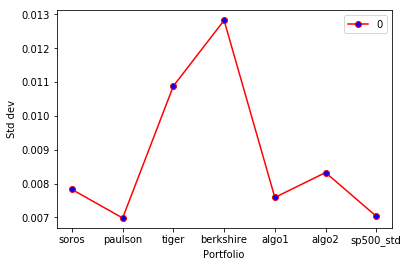

In [25]:
# Calculate the daily standard deviation of S&P TSX 60
sp500_std = combined_df['SP500'].std()
print(f"SP500's std is {sp500_std}")

# Determine which portfolios are riskier than the S&P TSX 60 using plot
std_list = [soros_std, paulson_std, tiger_std, berkshire_std, algo1_std, algo2_std, sp500_std]
row_names = ['soros', 'paulson', 'tiger', 'berkshire', 'algo1', 'algo2', 'sp500_std']

std_list_df = pd.DataFrame(std_list, row_names)

std_list_df.plot(marker='o', color='r', markerfacecolor='blue', xlabel='Portfolio', ylabel='Std dev')

print()
print(f"Portfolios 'TIGER', 'BERKSHIRE', and 'ALGO2' have higher variability in their daily returns when compared the SP500 \n"
      f"suggesting these portfolios are riskier than S&P TSX 60. ")
print()

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
soros_std_annl = combined_df['SOROS FUND MANAGEMENT LLC'].std() * 252
paulson_std_annl = combined_df['PAULSON & CO.INC. '].std() * 252
tiger_std_annl = combined_df['TIGER GLOBAL MANAGEMENT LLC'].std() * 252
berkshire_std_annl = combined_df['BERKSHIRE HATHAWAY INC'].std() * 252
algo1_std_annl = combined_df['Algo 1'].std() * 252
algo2_std_annl = combined_df['Algo 2'].std() * 252
sp500_std_annl = combined_df['SP500'].std() * 252

print(f"Soros' std is {soros_std_annl}")
print(f"Paulson's std is {paulson_std_annl}")
print(f"Tiger's std is {tiger_std_annl}")
print(f"Berkshire's std is {berkshire_std_annl}")
print(f"Algo1's std is {algo1_std_annl}")
print(f"Algo2's std is {algo2_std_annl}")
print(f"SP500's std is {sp500_std_annl}")

Soros' std is 1.9725492883909557
Paulson's std is 1.759545288873469
Tiger's std is 2.742462005426513
Berkshire's std is 3.232030039979132
Algo1's std is 1.9123985151359715
Algo2's std is 2.0982427181578047
SP500's std is 1.7726102726415867



Portfolios 'TIGER', 'BERKSHIRE', and 'ALGO2' have higher variability in their daily returns when compared the SP500 
suggesting these portfolios are riskier than S&P TSX 60. 



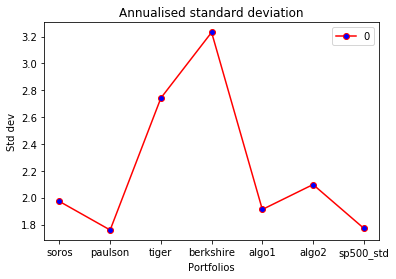

In [27]:
# Determine which portfolios are riskier than the S&P TSX 60
std_annl_list = [soros_std_annl, paulson_std_annl, tiger_std_annl, berkshire_std_annl, algo1_std_annl, algo2_std_annl, sp500_std_annl]
row_names = ['soros', 'paulson', 'tiger', 'berkshire', 'algo1', 'algo2', 'sp500_std']

std_annl_list_df = pd.DataFrame(std_annl_list, row_names)
std_annl_list_df.head()

std_annl_list_df.plot(marker='o', color='r', markerfacecolor='blue', ylabel='Std dev', xlabel='Portfolios', title='Annualised standard deviation')

print()
print(f"Portfolios 'TIGER', 'BERKSHIRE', and 'ALGO2' have higher variability in their daily returns when compared the SP500 \n"
      f"suggesting these portfolios are riskier than S&P TSX 60. ")
print()

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

Text(0, 0.5, 'Rollign std dev')

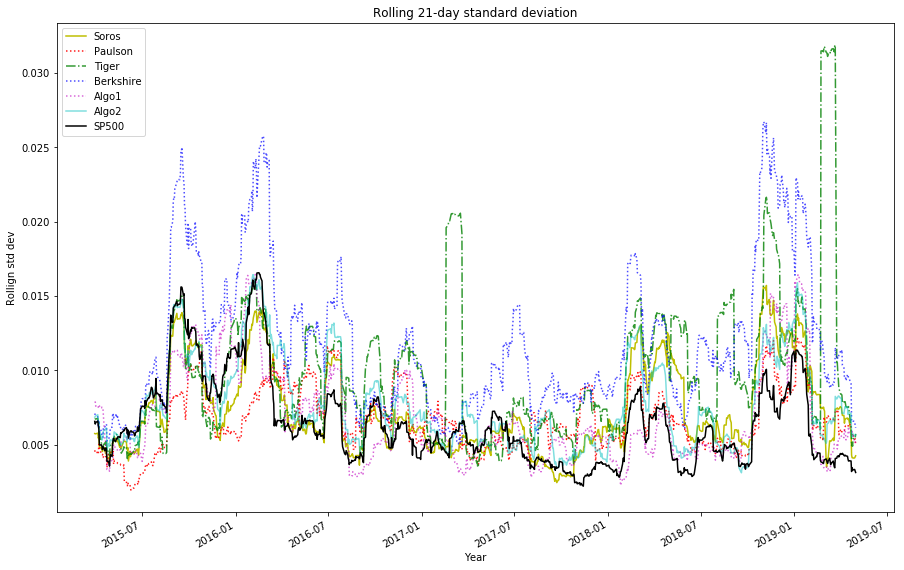

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
roll_std_soros = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=21).std()
roll_std_paulson = combined_df['PAULSON & CO.INC. '].rolling(window=21).std()
roll_std_tiger = combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).std()
roll_std_berkshire = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=21).std()
roll_std_algo1 = combined_df['Algo 1'].rolling(window=21).std()
roll_std_algo2 = combined_df['Algo 2'].rolling(window=21).std()
roll_std_sp500 = combined_df['SP500'].rolling(window=21).std()

# Plot the rolling standard deviation
plot3 = roll_std_soros.plot(figsize=(15, 10), title='Rolling 21-day standard deviation', color='y')
roll_std_paulson.plot(ax=plot3, color='r', linestyle='dotted', alpha=0.9)
roll_std_tiger.plot(ax=plot3, color='g', linestyle='dashdot', alpha=0.8)
roll_std_berkshire.plot(ax=plot3, color='b', linestyle='dotted', alpha=0.7)
roll_std_algo1.plot(ax=plot3, color='m', linestyle='dotted', alpha=0.6)
roll_std_algo2.plot(ax=plot3, color='c', alpha=0.5)
roll_std_sp500.plot(ax=plot3, color='k')

plot3.legend(['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo1', 'Algo2', 'SP500'])
plot3.set_xlabel('Year')
plot3.set_ylabel('Rollign std dev')

### Calculate and plot the correlation

Text(0.5, 1.0, 'Correlation')

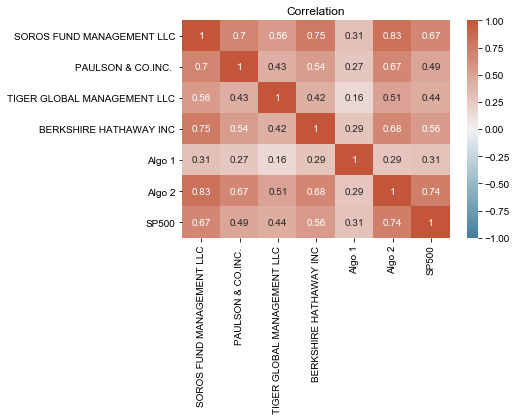

In [29]:
# Calculate the correlation
correlation = combined_df.corr()
correlation

# Display the correlation matrix
cmap = sns.diverging_palette(230, 20, as_cmap=True)

h = plt.axes()
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap=cmap)
sns.set(rc={'figure.figsize':(10,7)})
h.set_title('Correlation')

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

The beta score for Soros is 0.7499446668435334. 
The beta score for Paulson is 0.4829254312956259. 
The beta score for Tiger is 0.6816404904244641. 
The beta score for Berkshire is 1.0160439091063613. 
The beta score for Algo1 is 0.33474459081856855. 
The beta score for Algo2 is 0.8728267344999595. 


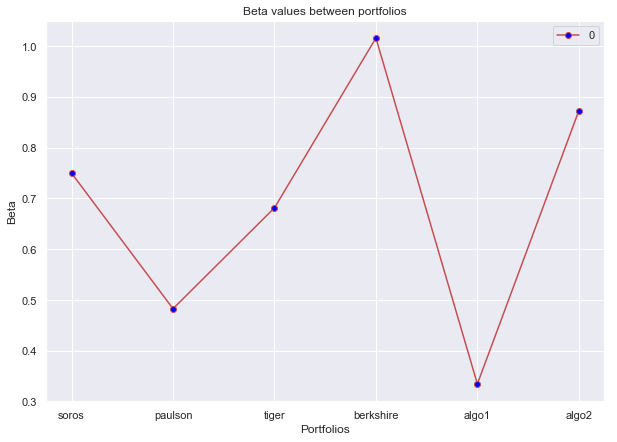

In [30]:
# Calculate covariance of a single portfolio
cov_soros = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['SP500'])
cov_paulson = combined_df['PAULSON & CO.INC. '].cov(combined_df['SP500'])
cov_tiger = combined_df['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_df['SP500'])
cov_berkshire = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['SP500'])
cov_algo1 = combined_df['Algo 1'].cov(combined_df['SP500'])
cov_algo2 = combined_df['Algo 2'].cov(combined_df['SP500'])

# Calculate variance of S&P TSX
var_SP500 = combined_df['SP500'].var()

# Computing beta
beta_soros = cov_soros / var_SP500
beta_paulson = cov_paulson / var_SP500
beta_tiger = cov_tiger / var_SP500
beta_berkshire = cov_berkshire / var_SP500
beta_algo1 = cov_algo1 / var_SP500
beta_algo2 = cov_algo2 / var_SP500

print(f"The beta score for Soros is {beta_soros}. ")
print(f"The beta score for Paulson is {beta_paulson}. ")
print(f"The beta score for Tiger is {beta_tiger}. ")
print(f"The beta score for Berkshire is {beta_berkshire}. ")
print(f"The beta score for Algo1 is {beta_algo1}. ")
print(f"The beta score for Algo2 is {beta_algo2}. ")

# Plot beta trend
beta_list = [beta_soros, beta_paulson, beta_tiger, beta_berkshire, beta_algo1, beta_algo2]
row_names = ['soros', 'paulson', 'tiger', 'berkshire', 'algo1', 'algo2']

beta_list_df = pd.DataFrame(beta_list, row_names)
beta_list_df.head()

beta_list_df.plot(marker='o', color='r', markerfacecolor='blue', ylabel='Beta', xlabel='Portfolios', title='Beta values between portfolios')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [56]:
# Use `ewm` to calculate the rolling window
roll_stat1 = combined_df.ewm(halflife=21, min_periods=21).mean()
roll_stat1.head(21)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Compare results to above
roll_stat2 = combined_df.rolling(window=21).mean()
roll_stat2.head(21)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

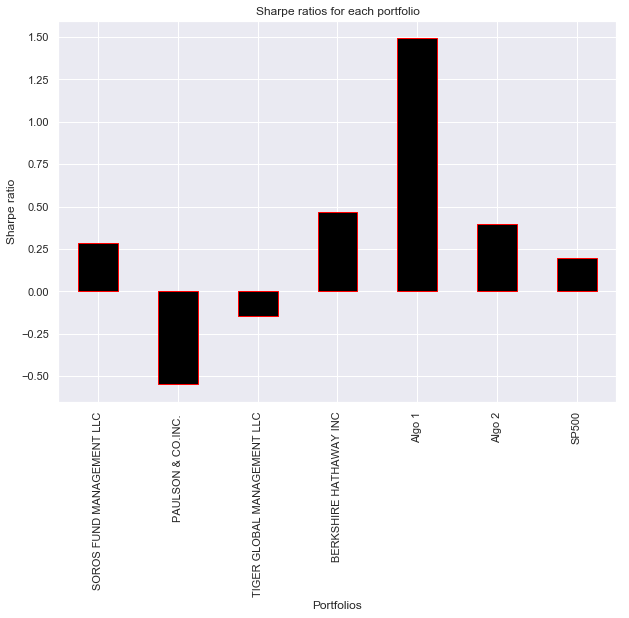

In [58]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_df.mean()*252) / (combined_df.std()*np.sqrt(252))
sharpe_ratio.sort_values(ascending=False)

# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar',
                  figsize=(10, 7),
                  title='Sharpe ratios for each portfolio', 
                  edgecolor='red', 
                  color='black',
                  ylabel='Sharpe ratio',
                  xlabel='Portfolios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo1 outperforms both S&P500 and Whale portfolios. This is determined by the following results:

 - Cumulative returns of 1.4 i.e, almost a 40% increase when compared to the SP500, and >= 20% increase when compared to whale portfolios. 
 - Relatively low standard deviation (annualised) of 1.9 when compared to SP500 (1.77) and other whale portfolios suggesting less variability in annual daily returns.
 - Beta of 0.33 suggesting Algo 1 is less volatile than the market.
 - Sharpe ratio of 1.49 suggesting Algo 1 has the best returns for the relative risk undertaken.
 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

In [34]:
# Reading data from 1st stock
ivv = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\MyFinTechHomework\Week4_31052021\Assignment\IVV.csv'
vap = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\MyFinTechHomework\Week4_31052021\Assignment\VAP.csv'
vso = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\MyFinTechHomework\Week4_31052021\Assignment\VSO.csv'
vas = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\MyFinTechHomework\Week4_31052021\Assignment\VAS.csv'

ivv_df = pd.read_csv(ivv, infer_datetime_format=True, parse_dates=True, index_col='Date')
ivv_drop_df = ivv_df.drop(columns=['Open', 'High', 'Low', 'Volume'])
ivv_drop_df.columns = ['IVV']
ivv_drop_df.drop_duplicates(inplace=True)
ivv_drop_df.index = ivv_drop_df.index.normalize()
ivv_final_df = ivv_drop_df.loc['2015-01-01':'2018-12-30']
ivv_final_df.head()

C:\Users\TribThapa\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  if sys.path[0] == '':


,IVV
Date,
2015-02-01,206.73
2015-05-01,203.10
2015-06-01,201.27
2015-07-01,203.76
2015-08-01,207.40


In [35]:
# Reading data from 2nd stock
vap_df = pd.read_csv(vap, infer_datetime_format=True, parse_dates=True, index_col='Date')
vap_drop_df = vap_df.drop(columns=['Open', 'High', 'Low', 'Volume'])
vap_drop_df.columns = ['VAP']
vap_drop_df.drop_duplicates(inplace=True)
vap_drop_df.index = vap_drop_df.index.normalize()
vap_final_df = vap_drop_df.loc['2015-01-01':'2018-12-30']
vap_final_df.head()

C:\Users\TribThapa\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  import sys


,VAP
Date,
2015-02-01,69.31
2015-05-01,69.75
2015-06-01,69.20
2015-07-01,70.03
2015-08-01,70.76


In [36]:
# Reading data from 3rd stock
vso_df = pd.read_csv(vso, infer_datetime_format=True, parse_dates=True, index_col='Date')
vso_drop_df = vso_df.drop(columns=['Open', 'High', 'Low', 'Volume'])
vso_drop_df.columns = ['VSO']
vso_drop_df.drop_duplicates(inplace=True)
vso_drop_df.index = vso_drop_df.index.normalize()
vso_final_df = vso_drop_df.loc['2015-01-01':'2018-12-30']
vso_final_df.head()

C:\Users\TribThapa\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  import sys


,VSO
Date,
2015-02-01,43.04
2015-05-01,43.17
2015-06-01,42.33
2015-07-01,42.10
2015-08-01,42.55


In [37]:
# Reading data from 4th stock
vas_df = pd.read_csv(vas, infer_datetime_format=True, parse_dates=True, index_col='Date')
vas_drop_df = vas_df.drop(columns=['Open', 'High', 'Low', 'Volume'])
vas_drop_df.columns = ['VAS']
vas_drop_df.drop_duplicates(inplace=True)
vas_drop_df.index = vas_drop_df.index.normalize()
vas_drop_df.loc['2015-01-01':'2018-12-30']
vas_final_df = vas_drop_df.loc['2015-01-01':'2018-12-30']
vas_final_df.head()

C:\Users\TribThapa\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  import sys
C:\Users\TribThapa\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


,VAS
Date,
2015-02-01,68.65
2015-05-01,68.65
2015-06-01,67.78
2015-07-01,67.69
2015-08-01,67.91


In [38]:
# Combine all stocks in a single DataFrame. # Reset Date index. Reorganize portfolio data by having a column per symbol
ivv_reset = ivv_final_df.reset_index()
vap_reset = vap_final_df.reset_index()
vso_reset = vso_final_df.reset_index()
vas_reset = vas_final_df.reset_index()

combined_own_df = pd.concat([ivv_reset['Date'], ivv_reset['IVV'], vap_reset['VAP'], vso_reset['VSO'], vas_reset['VAS']], axis='columns', join='inner')
combined_own_idx_df = combined_own_df.set_index('Date')
combined_own_idx_df

,IVV,VAP,VSO,VAS
Date,,,,
2015-02-01,206.73,69.31,43.04,68.65
2015-05-01,203.10,69.75,43.17,68.65
2015-06-01,201.27,69.20,42.33,67.78
2015-07-01,203.76,70.03,42.10,67.69
2015-08-01,207.40,70.76,42.55,67.91
...,...,...,...,...
2018-12-21,242.35,80.31,50.93,72.16
2018-12-24,236.09,81.45,50.21,71.42
2018-12-26,247.67,80.96,49.15,72.21


In [39]:
# Calculate daily returns
daily_returns_own = combined_own_idx_df.pct_change()

# Drop NAs
daily_returns_own.isna().sum()
daily_returns_own = daily_returns_own.dropna()

#daily_returns_own.isna().sum()

# Display sample data
daily_returns_own

,IVV,VAP,VSO,VAS
Date,,,,
2015-05-01,-0.017559,0.006348,0.003020,0.000000
2015-06-01,-0.009010,-0.007885,-0.019458,-0.012673
2015-07-01,0.012371,0.011994,-0.005433,-0.001328
2015-08-01,0.017864,0.010424,0.010689,0.003250
2015-09-01,-0.008438,0.007490,0.012221,0.020321
...,...,...,...,...
2018-12-21,-0.020531,-0.014964,-0.012793,0.001666
2018-12-24,-0.025830,0.014195,-0.014137,-0.010255
2018-12-26,0.049049,-0.006016,-0.021111,0.011061


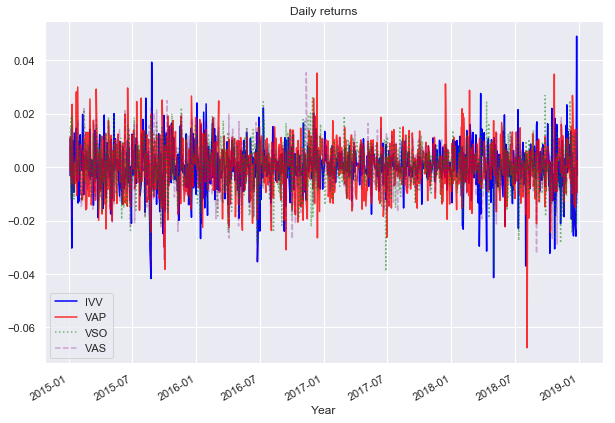

In [40]:
#Plot daily returns
plot1_own = daily_returns_own['IVV'].plot(figsize=(10,7), color='blue', title='Daily returns')
daily_returns_own['VAP'].plot(ax=plot1_own, color='red', alpha=0.8)
daily_returns_own['VSO'].plot(ax=plot1_own, color='green', linestyle='dotted', alpha=0.5)
daily_returns_own['VAS'].plot(ax=plot1_own, color='purple', linestyle='dashed', alpha=0.3)

plot1_own.set_xlabel('Year')
plot1_own.legend(['IVV', 'VAP', 'VSO', 'VAS'])
plot1_own.figure.savefig('CustomPorfolio_DailyReturns.png')

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock


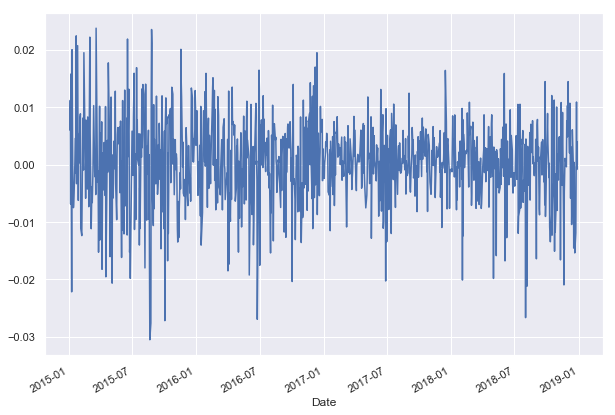

In [43]:
# Set weights (equal weighting)
weights = [0.33, 0.33, 0.33, 0.33]

# Calculate portfolio return
own_portfolio_return = daily_returns_own.dot(weights)

# Display sample data
own_portfolio_return.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [44]:
# Join your returns DataFrame to the original returns DataFrame
new_df = pd.concat([combined_df, own_portfolio_return], axis='columns', join='inner')
new_rename_df = new_df.rename(columns={int(0): 'ThapaPortfolio'})
new_rename_df.head()
new_rename_df.tail()
#new_rename_df.shape                    

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,ThapaPortfolio
Date,,,,,,,,
2018-12-20,-0.016673,-0.008347,-0.011045,-0.025463,-0.026095,-0.023793,-0.008573,-0.000500
2018-12-21,-0.022720,-0.020980,-0.022570,-0.028892,-0.017888,-0.021636,-0.014590,-0.015385
2018-12-24,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.011141,-0.011889
2018-12-27,0.004184,-0.007472,0.009149,0.004813,0.001571,0.000494,0.027940,-0.000850
2018-12-28,0.001145,0.000863,-0.004019,-0.006178,0.014664,0.011664,0.004009,0.003953


In [60]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_rename_drop_df = new_rename_df.dropna()
new_rename_drop_df.shape

(837, 8)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

Soros' std is 2.0177416371756203
Paulson's std is 1.7554153052983708
Tiger's std is 2.5568907601017643
Berkshire's std is 3.28928161627458
Algo1's std is 1.9201322266545604
Algo2's std is 2.1296217753353672
SP500's std is 1.8375068453556502
Thapa's std is 1.816811447509332


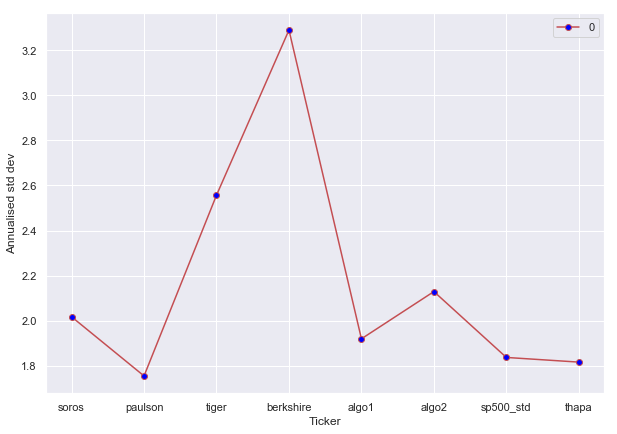

In [62]:
# Calculate the annualized standard deviation (252 trading days)
soros_std_annl = new_rename_drop_df['SOROS FUND MANAGEMENT LLC'].std() * 252
paulson_std_annl = new_rename_drop_df['PAULSON & CO.INC. '].std() * 252
tiger_std_annl = new_rename_drop_df['TIGER GLOBAL MANAGEMENT LLC'].std() * 252
berkshire_std_annl = new_rename_drop_df['BERKSHIRE HATHAWAY INC'].std() * 252
algo1_std_annl = new_rename_drop_df['Algo 1'].std() * 252
algo2_std_annl = new_rename_drop_df['Algo 2'].std() * 252
sp500_std_annl = new_rename_drop_df['SP500'].std() * 252
thapa_annl = new_rename_drop_df['ThapaPortfolio'].std() * 252

# Print std devs for each portfolio
print(f"Soros' std is {soros_std_annl}")
print(f"Paulson's std is {paulson_std_annl}")
print(f"Tiger's std is {tiger_std_annl}")
print(f"Berkshire's std is {berkshire_std_annl}")
print(f"Algo1's std is {algo1_std_annl}")
print(f"Algo2's std is {algo2_std_annl}")
print(f"SP500's std is {sp500_std_annl}")
print(f"Thapa's std is {thapa_annl}")

# Create list and plot std devs
std_annl_list = [soros_std_annl, paulson_std_annl, tiger_std_annl, berkshire_std_annl, algo1_std_annl, algo2_std_annl, sp500_std_annl, thapa_annl]
row_names = ['soros', 'paulson', 'tiger', 'berkshire', 'algo1', 'algo2', 'sp500_std', 'thapa']

std_annl_list_df = pd.DataFrame(std_annl_list, row_names)
plot2 = std_annl_list_df.plot(marker='o', color='r', markerfacecolor='blue', xlabel='Ticker', ylabel='Annualised std dev')
plot2.figure.savefig('CustomPorfolio_AnnualisedStdDev.png')

### Calculate and plot rolling `std` with 21-day window

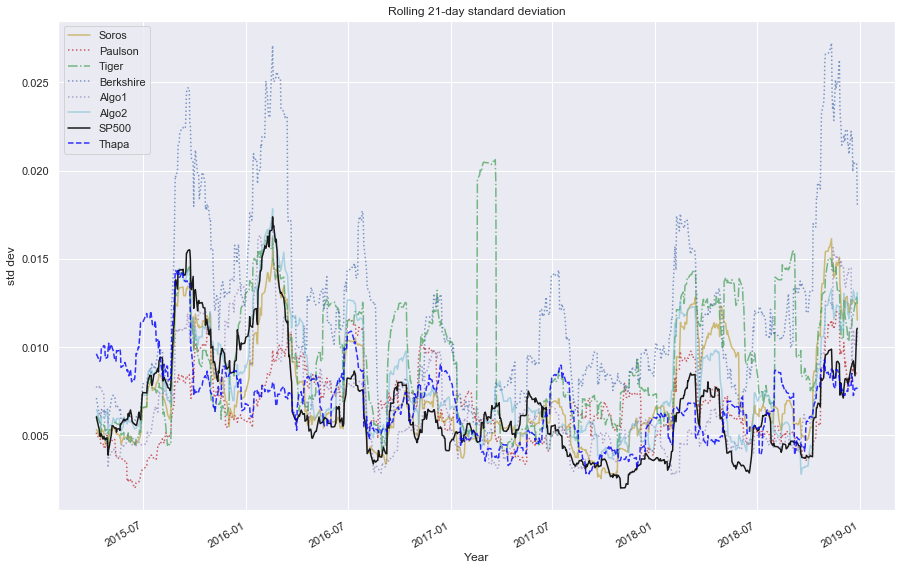

In [47]:
# Calculate rolling standard deviation
roll_std_soros = new_rename_drop_df['SOROS FUND MANAGEMENT LLC'].rolling(window=21).std()
roll_std_paulson = new_rename_drop_df['PAULSON & CO.INC. '].rolling(window=21).std()
roll_std_tiger = new_rename_drop_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).std()
roll_std_berkshire= new_rename_drop_df['BERKSHIRE HATHAWAY INC'].rolling(window=21).std()
roll_std_algo1 = new_rename_drop_df['Algo 1'].rolling(window=21).std()
roll_std_algo2 = new_rename_drop_df['Algo 2'].rolling(window=21).std()
roll_std_sp500 = new_rename_drop_df['SP500'].rolling(window=21).std()
roll_std_thapa = new_rename_drop_df['ThapaPortfolio'].rolling(window=21).std()


# Plot the rolling standard deviation
plot3 = roll_std_soros.plot(figsize=(15, 10), title='Rolling 21-day standard deviation', color='y')
roll_std_paulson.plot(ax=plot3, color='r', linestyle='dotted', alpha=0.9)
roll_std_tiger.plot(ax=plot3, color='g', linestyle='dashdot', alpha=0.8)
roll_std_berkshire.plot(ax=plot3, color='b', linestyle='dotted', alpha=0.7)
roll_std_algo1.plot(ax=plot3, color='m', linestyle='dotted', alpha=0.6)
roll_std_algo2.plot(ax=plot3, color='c', alpha=0.5)
roll_std_sp500.plot(ax=plot3, color='k')
roll_std_thapa.plot(ax=plot3, color='blue', alpha=0.8, linestyle='dashed')


plot3.legend(['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo1', 'Algo2', 'SP500', 'Thapa'])
plot3.set_xlabel('Year')
plot3.set_ylabel('std dev')
plot3.figure.savefig('CustomPorfolio_StdDev21DayRoll.png')

### Calculate and plot the correlation

Text(0.5, 1.0, 'Correlation')

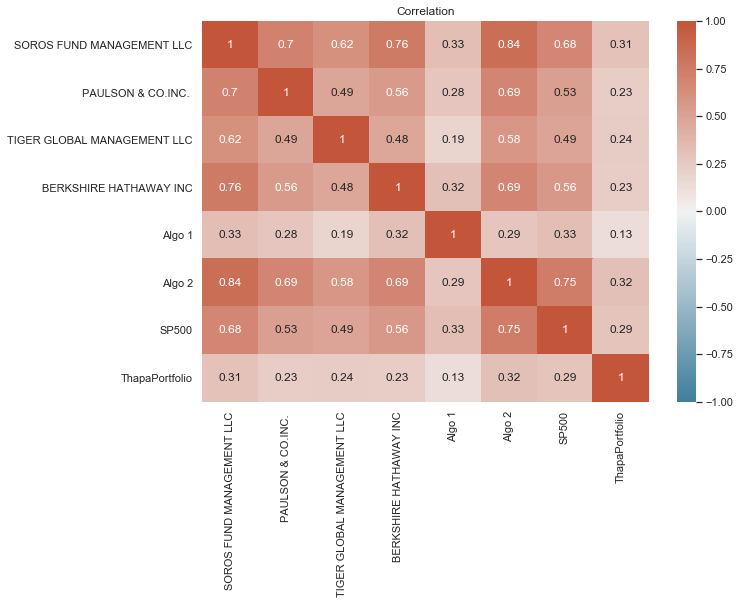

In [63]:
# Calculate and plot the correlation
correlation_all = new_rename_drop_df.corr()
correlation_all

# Figure settings
cmap = sns.diverging_palette(230, 20, as_cmap=True)
h = plt.axes()
sns.heatmap(correlation_all, vmin=-1, vmax=1, annot=True, cmap=cmap)
sns.set(rc={'figure.figsize':(10,7)})
h.set_title('Correlation')

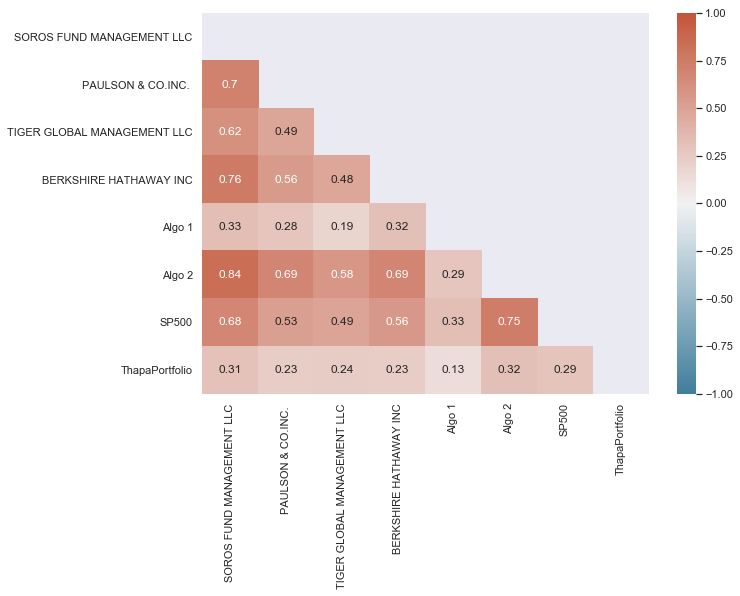

In [64]:
#Correlation plot as above but only the lower triangle for easier interpretation
matrix = np.triu(correlation_all)
plot4 = sns.heatmap(correlation_all, vmin=-1, vmax=1, annot=True, cmap=cmap, mask=matrix)
plot4.figure.savefig('CustomPorfolio_Correlations.png', bbox_inches="tight")

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

The average beta score for ThapaPortfolio is 0.2728400699397681. 



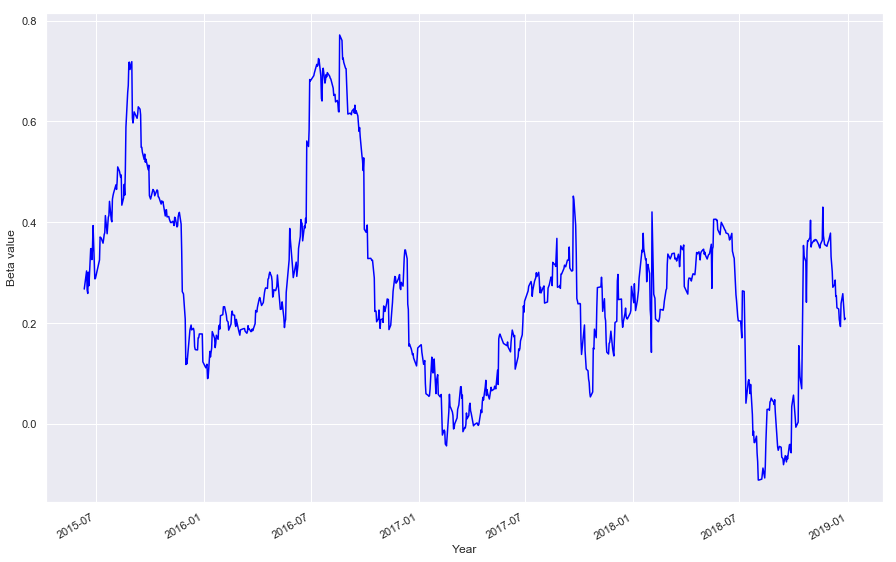

In [50]:
# Calculate covariance of a single portfolio
cov_thapa = new_rename_drop_df['ThapaPortfolio'].rolling(window=60).cov(new_rename_drop_df['SP500'])

# Calculate variance of S&P TSX
var_SP500 = new_rename_drop_df['SP500'].rolling(window=60).var()

# Computing beta
beta_thapa = cov_thapa / var_SP500
print(f"The average beta score for ThapaPortfolio is {beta_thapa.mean()}. ")
print()

# Plot beta trend
plot_own_beta = beta_thapa.plot(figsize=(15,10), color='blue')

# Set the legend of the figure
plot_own_beta.set_xlabel('Year')
plot_own_beta.set_ylabel('Beta value')
plot_own_beta.figure.savefig('CustomPortFolio_Beta.png')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio_all = (new_rename_drop_df.mean()*252) / (new_rename_drop_df.std()*np.sqrt(252))
sharpe_ratio_all.sort_values(ascending=False)

Algo 1                         1.207276
ThapaPortfolio                 0.452956
TIGER GLOBAL MANAGEMENT LLC    0.024154
Algo 2                        -0.192732
BERKSHIRE HATHAWAY INC        -0.223097
SP500                         -0.282193
SOROS FUND MANAGEMENT LLC     -0.370456
PAULSON & CO.INC.             -1.035864
dtype: float64

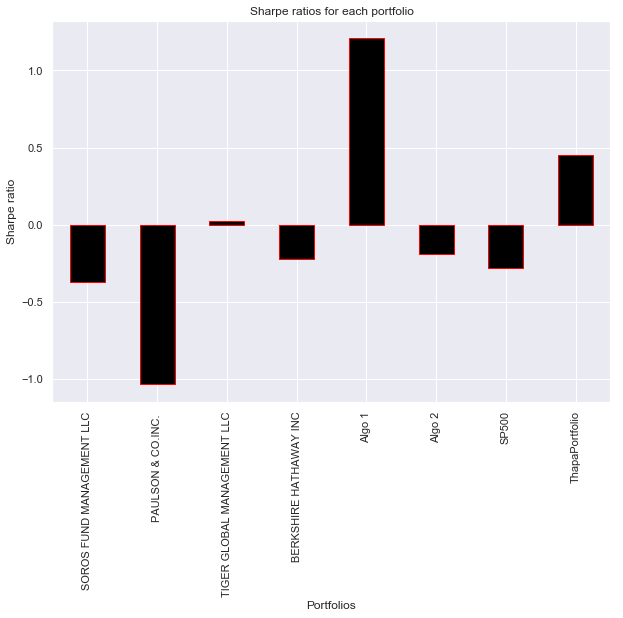

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_thapa = sharpe_ratio_all.plot(kind='bar',
                                           figsize=(10, 7),
                                           title='Sharpe ratios for each portfolio', 
                                           edgecolor='red', 
                                           color='black',
                                           ylabel='Sharpe ratio',
                                           xlabel='Portfolios')
sharpe_ratio_thapa.figure.savefig('CustomPortfolio_SharpeRatio.png',  bbox_inches="tight")

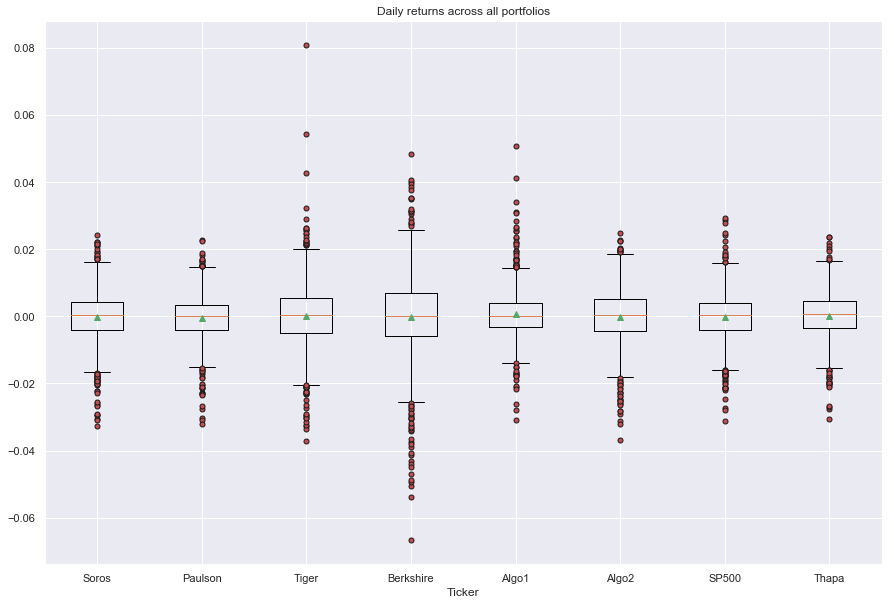

In [53]:
# Box plot to visually show risk
data_to_plot = [new_rename_drop_df['SOROS FUND MANAGEMENT LLC'], 
                new_rename_drop_df['PAULSON & CO.INC. '],
                new_rename_drop_df['TIGER GLOBAL MANAGEMENT LLC'],
                new_rename_drop_df['BERKSHIRE HATHAWAY INC'],
                new_rename_drop_df['Algo 1'],
                new_rename_drop_df['Algo 2'],
                new_rename_drop_df['SP500'],
                new_rename_drop_df['ThapaPortfolio']]

flierprops = dict(marker='o', markerfacecolor='r', markersize=5, markeredgecolor='k')

fig, ax = plt.subplots(figsize=(15, 10))

box = plt.boxplot(data_to_plot,
                  labels =['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo1', 'Algo2', 'SP500', 'Thapa'],
                  flierprops=flierprops,
                  showmeans=True)

ax.set_title('Daily returns across all portfolios')
ax.set_xlabel('Ticker')

fig.savefig('CustomPortfolio_DailyReturns.png')

### How does your portfolio do?

Compared to the other portfolios, my portfolio is conservative because

- Annualised std: 1.8 suggesting less variability in daily returns compared to all portfolios except Paulson. Therefore, a stable portfolio but with less potential for good returns. 
- Beta (market volatility): 0.41 suggesting the portfolio is less volatile than the market, and further supports the interpretation from annualised std above. 
- SharpeRatio (relative risk): 0.45 is very conservative due to low risk 